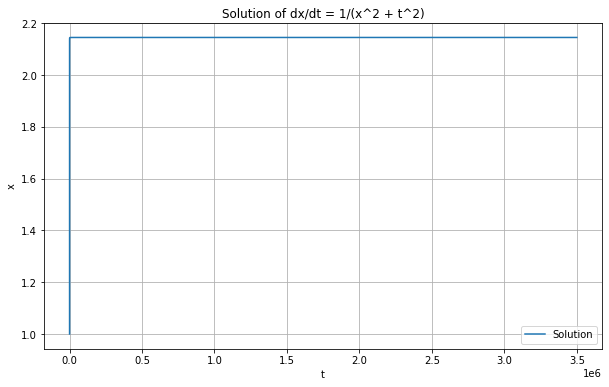

The value of the solution at t = 3.5e6 is x = 2.144819


In [25]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the differential equation
def f(t, x):
    return 1 / (x**2 + t**2)

# Define initial conditions
t0 = 0
x0 = 1

# Define time points for evaluation
tf = 3.5e6

# Solve the initial value problem using RK45 method
sol = solve_ivp(f, (t0, tf), [x0], method='RK45', rtol=1e-6, atol=1e-10)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], label='Solution')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Solution of dx/dt = 1/(x^2 + t^2)')
plt.legend()
plt.grid(True)
plt.show()

# Print the value at t = 3.5e6
index = np.where(sol.t == 3.5e6)[0][0]
print(f'The value of the solution at t = 3.5e6 is x = {sol.y[0, index]:.6f}')


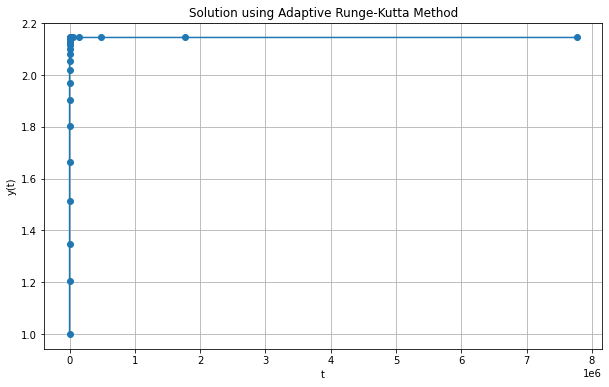

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation
def f(t, y):
    return 1 / (y**2 + t**2)

def runge_kutta_step(t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + h/2, y + k1/2)
    k3 = h * f(t + h/2, y + k2/2)
    k4 = h * f(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

def adaptive_runge_kutta(t0, y0, t_end, h0, tol):
    t_values = [t0]
    y_values = [y0]
    h = h0
    t = t0
    y = y0
    while t < t_end:
        y1 = runge_kutta_step(t, y, h)
        y2 = runge_kutta_step(t, y, h/2)
        y2 = runge_kutta_step(t + h/2, y2, h/2)
        error = np.abs(y2 - y1)
        if error < tol:
            y = y2
            t += h
            t_values.append(t)
            y_values.append(y)
        if error != 0:
            h = 0.9 * h * (tol / error)**0.25
    return np.array(t_values), np.array(y_values)

t0 = 0
y0 = 1
t_end = 3.5e6
h0 = 1
tol = 1e-4

t_values, y_values = adaptive_runge_kutta(t0, y0, t_end, h0, tol)

plt.figure(figsize=(10, 6))
plt.plot(t_values, y_values, marker='o', linestyle='-')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Solution using Adaptive Runge-Kutta Method')
plt.grid(True)
plt.show()


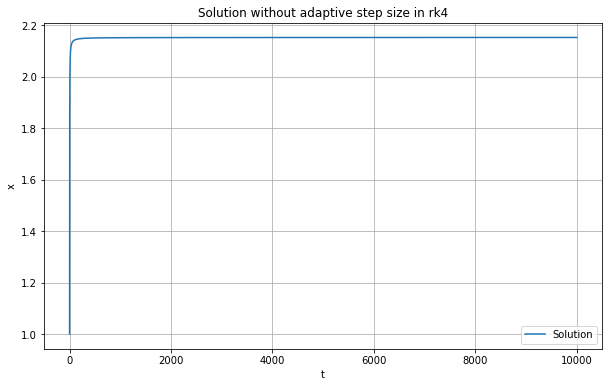

The value of the solution at t = 3.5e6 is x = 2.152801


In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Define the differential equation
def f(t, x):
    return 1 / (x**2 + t**2)

# Implement the fourth-order Runge-Kutta method
def runge_kutta(f, t0, x0, h, tf):
    t_values = np.arange(t0, tf, h)
    x_values = []
    x = x0
    for t in t_values:
        x_values.append(x)
        k1 = h * f(t, x)
        k2 = h * f(t + h/2, x + k1/2)
        k3 = h * f(t + h/2, x + k2/2)
        k4 = h * f(t + h, x + k3)
        x = x + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t_values, np.array(x_values)

# Define initial conditions
t0 = 0
x0 = 1

# Define time points for evaluation
#tf = 3.5e6
tf = 10000
h = 1  # Step size
t_values, x_values = runge_kutta(f, t0, x0, h, tf)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label='Solution')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Solution without adaptive step size in rk4')
plt.legend()
plt.grid(True)
plt.show()

# Print the value at t = 3.5e6
index = np.where(t_values == 9999)[0][0]
print(f'The value of the solution at t = 3.5e6 is x = {x_values[index]:.6f}')
